

# Classifying Fruits and Vegetables Using Image Classification
The given dataset contains images of a variety of fruits and vegetables, offering a rich source for
developing and testing image recognition algorithms. The food items are categorized as follows:

Fruits:
Banana, Apple, Pear, Grapes, Orange, Kiwi, Watermelon, Pomegranate, Pineapple, Mango

Vegetables:
Cucumber, Carrot, Capsicum, Onion, Potato, Lemon, Tomato, Radish, Beetroot, Cabbage,
Lettuce, Spinach, Soybean, Cauliflower, Bell Pepper, Chilly,  Pepper, Turnip, Corn, Sweetcorn,
Sweet Potato, Paprika, Jalapeño, Ginger, Garlic, Peas, Eggplant

Given this dataset, your task is to create a machine learning model that can classify the images
into two main categories: Fruits and Vegetables.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


Data Preprocessing

In [ ]:
#Training Image Preprocessing
train_set=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',
labels='inferred',
label_mode='categorical',
class_names=None,
color_mode='rgb',
batch_size=64,
image_size=(32,32),
shuffle=True,
seed=None,
validation_split=None,
subset=None, interpolation='bilinear',
follow_links=False, crop_to_aspect_ratio=False
)

Found 3218 files belonging to 36 classes.


In [ ]:
#validation Image Preprocessing
validation_set=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation',
labels='inferred',
label_mode='categorical',
class_names=None,
color_mode='rgb',
batch_size=64,
image_size=(32,32),
shuffle=True,
seed=None,
validation_split=None,
subset=None, interpolation='bilinear',
follow_links=False, crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [ ]:
#validation Image Preprocessing
test_set=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',
labels='inferred',
label_mode='categorical',
class_names=None,
color_mode='rgb',
batch_size=64,
image_size=(32,32),
shuffle=True,
seed=None,
validation_split=None,
subset=None, interpolation='bilinear',
follow_links=False, crop_to_aspect_ratio=False
)

Found 369 files belonging to 36 classes.


In [ ]:
class_names = train_set.class_names
print("Classes found:", class_names)

Classes found: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [ ]:
def normalize_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_set = train_set.map(normalize_images)
validation_set = validation_set.map(normalize_images)
test_set = test_set.map(normalize_images)




In [ ]:
# Reshape images to (28, 28, 1) since CNN expects 3D input (height, width, channels)
def add_channel(image, label):
    image = tf.expand_dims(image, -1)  # Adds a channel dimension
    return image, label

train_set = train_set.map(add_channel)
test_set = test_set.map(add_channel)
validation_set = validation_set.map(add_channel)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),


    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(36, activation='softmax')  # Output layer with 36 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [ ]:
history = model.fit(train_set,
                    validation_data=validation_set,
                    epochs=10)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8764 - loss: 0.5043 - val_accuracy: 0.9288 - val_loss: 0.3239
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9153 - loss: 0.3736 - val_accuracy: 0.9544 - val_loss: 0.2783
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9383 - loss: 0.2959 - val_accuracy: 0.9516 - val_loss: 0.2605
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9459 - loss: 0.2289 - val_accuracy: 0.9487 - val_loss: 0.2420
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9748 - loss: 0.1507 - val_accuracy: 0.9544 - val_loss: 0.2679
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9730 - loss: 0.1379 - val_accuracy: 0.9601 - val_loss: 0.2239
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 78s 924ms/step - accuracy: 0.9785 - loss: 0.1147 - val_accuracy: 0.9544 - val_loss: 0.2577
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9817 - loss: 0.0969 - val_accuracy: 0.9573 - val_lo

In [ ]:
testloss, testaccuracy = model.evaluate(test_set)
print(f"Test accuracy: {testaccuracy}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 84s 14s/step - accuracy: 0.9626 - loss: 0.2429
Test accuracy: 0.9566395878791809


Visualize Training and Validation Accuracy & Loss

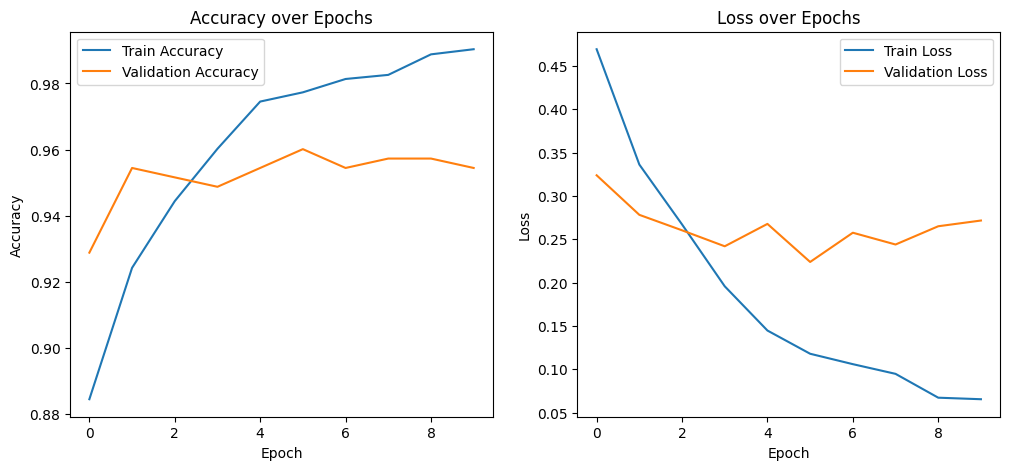

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


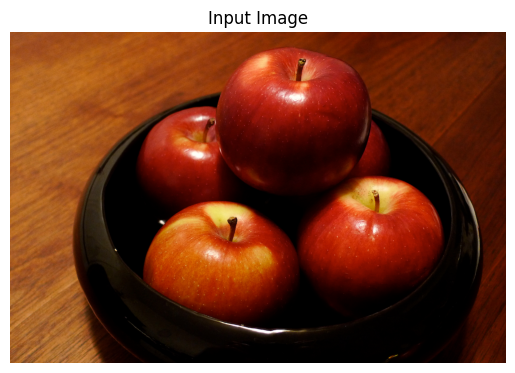

 Category: fruit


In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# List of class names in order as used during training
class_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum',
               'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant',
               'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce',
               'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple',
               'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn',
               'sweetpotato', 'tomato', 'turnip', 'watermelon']

# Fruits vs. Vegetables mapping
def get_category(label):
    fruits = ['apple', 'banana', 'grapes', 'kiwi', 'lemon', 'mango',
              'orange', 'paprika', 'pear', 'pineapple', 'pomegranate', 'watermelon']
    return 'fruit' if label in fruits else 'vegetable'

# Load and preprocess image
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, [32, 32])
    image = tf.cast(image, tf.float32) / 255.0
    return image


# Predict and show high-quality output
def predict_fruit_or_vegetable(model, image_path):

    image = load_and_preprocess_image(image_path)
    image_expanded = tf.expand_dims(image, axis=0)

    predictions = model.predict(image_expanded)
    predicted_index = np.argmax(predictions)
    confidence = np.max(predictions)
    predicted_class = class_names[predicted_index]
    category = get_category(predicted_class)
 # Load and display original image
    original_image = Image.open(image_path)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()


    return predicted_class, category, confidence
image_path = "/content/drive/MyDrive/Fruit_Vegetable_Recognition/test/apple/Image_7.jpg"
predicted_class, category, confidence = predict_fruit_or_vegetable(model, image_path)
print(f" Category: {category}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


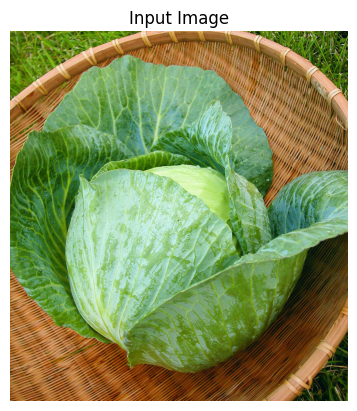

 Category: vegetable


In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# List of class names in order as used during training
class_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum',
               'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant',
               'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce',
               'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple',
               'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn',
               'sweetpotato', 'tomato', 'turnip', 'watermelon']

# Fruits vs. Vegetables mapping
def get_category(label):
    fruits = ['apple', 'banana', 'grapes', 'kiwi', 'lemon', 'mango',
              'orange', 'paprika', 'pear', 'pineapple', 'pomegranate', 'watermelon']
    return 'fruit' if label in fruits else 'vegetable'

# Load and preprocess image
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, [32, 32])
    image = tf.cast(image, tf.float32) / 255.0
    return image


# Predict and show high-quality output
def predict_fruit_or_vegetable(model, image_path):

    image = load_and_preprocess_image(image_path)
    image_expanded = tf.expand_dims(image, axis=0)

    predictions = model.predict(image_expanded)
    predicted_index = np.argmax(predictions)
    confidence = np.max(predictions)
    predicted_class = class_names[predicted_index]
    category = get_category(predicted_class)
 # Load and display original image
    original_image = Image.open(image_path)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()


    return predicted_class, category, confidence
image_path = "/content/drive/MyDrive/Fruit_Vegetable_Recognition/test/cabbage/Image_1.jpg"
predicted_class, category, confidence = predict_fruit_or_vegetable(model, image_path)
print(f" Category: {category}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


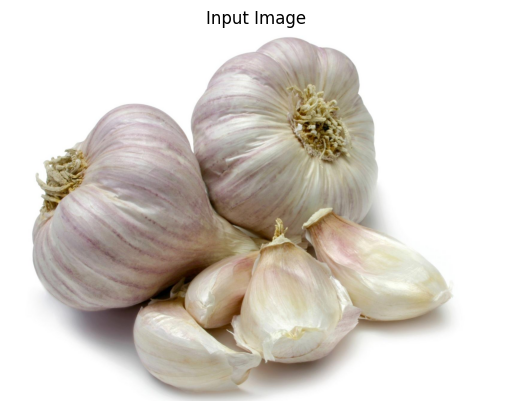

 Category: vegetable


In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# List of class names in order as used during training
class_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum',
               'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant',
               'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce',
               'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple',
               'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn',
               'sweetpotato', 'tomato', 'turnip', 'watermelon']

# Fruits vs. Vegetables mapping
def get_category(label):
    fruits = ['apple', 'banana', 'grapes', 'kiwi', 'lemon', 'mango',
              'orange', 'paprika', 'pear', 'pineapple', 'pomegranate', 'watermelon']
    return 'fruit' if label in fruits else 'vegetable'

# Load and preprocess image
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, [32, 32])
    image = tf.cast(image, tf.float32) / 255.0
    return image


# Predict and show high-quality output
def predict_fruit_or_vegetable(model, image_path):

    image = load_and_preprocess_image(image_path)
    image_expanded = tf.expand_dims(image, axis=0)

    predictions = model.predict(image_expanded)
    predicted_index = np.argmax(predictions)
    confidence = np.max(predictions)
    predicted_class = class_names[predicted_index]
    category = get_category(predicted_class)
 # Load and display original image
    original_image = Image.open(image_path)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()


    return predicted_class, category, confidence
image_path = "/content/drive/MyDrive/Fruit_Vegetable_Recognition/test/garlic/Image_10.jpg"
predicted_class, category, confidence = predict_fruit_or_vegetable(model, image_path)
print(f" Category: {category}")